In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 

In [2]:
# the csv file we have contains the data of thhe BitCoin price from 2022-01-01 to 2023-12-31
# we will use this data to predict the price of the BitCoin in the future using the ARIMA , LSTM and Prophet models
# we will start by loading the data and visu# the csv file we have contains the data of thhe BitCoin price from 2022-01-01 to 2023-12-31
# we will use this data to predict the price of the BitCoin in the future using the ARIMA , LSTM and Prophet models
# we will start by loading the data and visualizing it
data_btc = pd.read_csv('BTC-USD.csv')
#data_btc.head()

data_eth = pd.read_csv('ETH-USD.csv')
#data_eth.head()

data_ada= pd.read_csv('ADA-USD.csv')

## Basic Visualizations :

In [3]:
import plotly.express as px

# Creating an interactive scatter plot for Open, High, Low, and Close prices of Bitcoin
fig = px.scatter(data_btc, x='Date', y=['Open', 'High', 'Low', 'Close'],
                 labels={'value': 'Price (USD)', 'variable': 'Price Type'},
                 title='Bitcoin (BTC) Price: Open, High, Low, Close')

# Setting different colors for each price type
fig.update_traces(marker=dict(size=5),
                  selector=dict(type='scatter', mode='markers'))

# Enhancing interactivity
fig.update_layout(hovermode='closest')
fig.show()


In [4]:
# # Question number 1, we have to visualize the data of the BitCoin, Ethereum and Cardano in a single plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_btc['Date'], y=data_btc['Close'], mode='lines', name='BitCoin'))
fig.add_trace(go.Scatter(x=data_eth['Date'], y=data_eth['Close'], mode='lines', name='Ethereum'))
fig.add_trace(go.Scatter(x=data_ada['Date'], y=data_ada['Close'], mode='lines', name='Cardano'))
fig.update_layout(title='BitCoin, Ethereum and Cardano Prices', xaxis_title='Date', yaxis_title='Price')
fig.show()
#

## All time high and lows

In [5]:
# Finding the all-time high and all-time low for Bitcoin (BTC)

# All-time high
all_time_high = data_btc['High'].max()
all_time_high_date = data_btc[data_btc['High'] == all_time_high]['Date'].iloc[0]

# All-time low
all_time_low = data_btc['Low'].min()
all_time_low_date =data_btc[data_btc['Low'] == all_time_low]['Date'].iloc[0]
print(f"The highest values for BitCoin was {all_time_high} on {all_time_high_date} and the lowest value was {all_time_low} on {all_time_low_date}")
#all_time_high, all_time_high_date, all_time_low, all_time_low_date

# do the same for all_time_high and all_time_ of eth and cardano
# All-time high
all_time_high_eth = data_eth['High'].max()
all_time_high_date_eth = data_eth[data_eth['High'] == all_time_high_eth]['Date'].iloc[0]

# All-time low
all_time_low_eth = data_eth['Low'].min()
all_time_low_date_eth =data_eth[data_eth['Low'] == all_time_low_eth]['Date'].iloc[0]
print(f"The following are the highest and lowest values for Ethereum: {all_time_high_eth} on {all_time_high_date_eth} and {all_time_low_eth} on {all_time_low_date_eth}")
#all_time_high_eth, all_time_high_date_eth, all_time_low_eth, all_time_low_date_eth

# All-time high
all_time_high_ada = data_ada['High'].max()
all_time_high_date_ada = data_ada[data_ada['High'] == all_time_high_ada]['Date'].iloc[0]

# All-time low
all_time_low_ada = data_ada['Low'].min()
all_time_low_date_ada =data_ada[data_ada['Low'] == all_time_low_ada]['Date'].iloc[0]

#all_time_high_ada, all_time_high_date_ada, all_time_low_ada, all_time_low_date_ada
print(f"The maximum number of Cardano was {all_time_high_ada} on {all_time_high_date_ada} and the minimum was {all_time_low_ada} on {all_time_low_date_ada}")

The highest values for BitCoin was 69170.625 on 2024-03-05 and the lowest value was 171.509995 on 2015-01-14
The following are the highest and lowest values for Ethereum: 4891.70459 on 2021-11-16 and 82.829887 on 2018-12-15
The maximum number of Cardano was 3.099186 on 2021-09-02 and the minimum was 0.01913 on 2020-03-13


## Percentage Increase in the Price 

In [6]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_btc['Date'] = pd.to_datetime(data_btc['Date'])
data_btc['YearMonth'] = data_btc['Date'].dt.to_period('M')
monthly_data = data_btc.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

# max_increase_month, max_increase_value
print(f"The monthly data for BitCoin shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for BitCoin shows that the month with the highest percentage increase was 2017-05 with a value of 69.57723273063533


In [7]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_eth['Date'] = pd.to_datetime(data_eth['Date'])
data_eth['YearMonth'] = data_eth['Date'].dt.to_period('M')
monthly_data = data_eth.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

# max_increase_month, max_increase_value
print(f"The monthly data for Etherium shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for Etherium shows that the month with the highest percentage increase was 2021-01 with a value of 78.25285063118993


In [8]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_ada['Date'] = pd.to_datetime(data_ada['Date'])
data_ada['YearMonth'] = data_ada['Date'].dt.to_period('M')
monthly_data = data_ada.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

# max_increase_month, max_increase_value
print(f"The monthly data for Cardano shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for Cardano shows that the month with the highest percentage increase was 2017-12 with a value of 517.117696489513


## Candle Stick Visualization

In [9]:
# we have to visualize the data of the Ethereum using candlestick chart. we have to make sure that it is interactive and candlestick chart is perfect
fig = go.Figure(data=[go.Candlestick(x=data_btc['Date'],
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])
fig.update_layout(title='BitCoin Price', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [10]:
# do the same for ethereum
fig2 = go.Figure(data=[go.Candlestick(x=data_eth['Date'],
                open=data_eth['Open'],
                high=data_eth['High'],
                low=data_eth['Low'],
                close=data_eth['Close'])])
# show volume
fig2.update_layout(title='Ethereum Price', xaxis_title='Date', yaxis_title='Price')
fig2.show()

In [11]:
# now we have to visualize the data of the Cardano using candlestick chart
fig3 = go.Figure(data=[go.Candlestick(x=data_ada['Date'],
                open=data_ada['Open'],
                high=data_ada['High'],
                low=data_ada['Low'],
                close=data_ada['Close'])])
fig3.update_layout(title='Cardano Price', xaxis_title='Date', yaxis_title='Price')
fig3.show()

## Coming towards the model implementation

### Model 1: Linear regression


R-squared: 0.9976082602380427
Mean Squared Error: 661059.1527066512


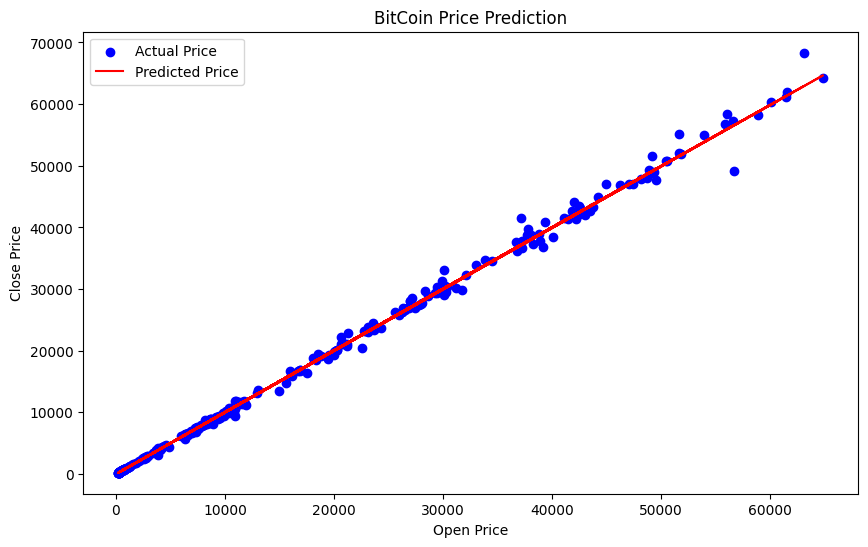

In [12]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_btc['Open'].values
y = data_btc['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('BitCoin Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of BitCoin on 1st January 2024 is {predicted_price[0]}")


The predicted price of BitCoin on 1st January 2024 is 66689.64304249837


R-squared: 0.9962167773067242
Mean Squared Error: 4430.351161821398


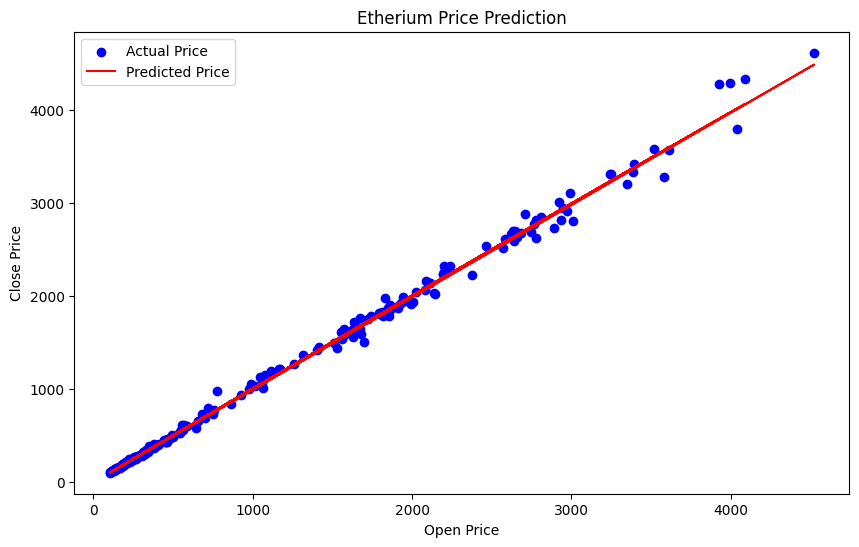

In [14]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_eth['Open'].values
y = data_eth['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Etherium Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [15]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of Etherium on 2nd January 2024 is {predicted_price[0]}")

The predicted price of Etherium on 2nd January 2024 is 3858.6808822103467


R-squared: 0.9946413310965496
Mean Squared Error: 0.0015911137297649738


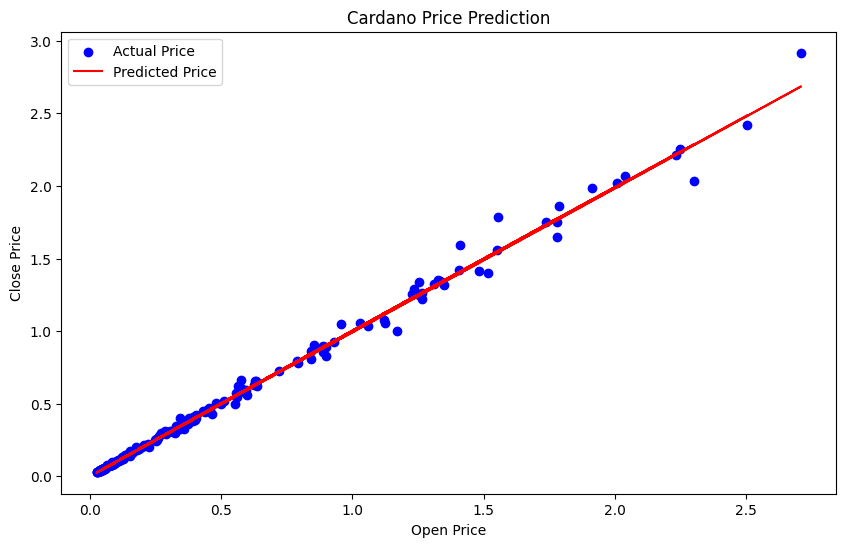

In [16]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_ada['Open'].values
y = data_ada['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Cardano Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [17]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of Cardano on 2nd January 2024 is {predicted_price[0]}")

The predicted price of Cardano on 2nd January 2024 is 0.747775201909629


# Predictions of Linear Regression on 2nd January 2024

## Bitcoin:
### Actual Value of closing : 44,957
### Predicted Value of closing: 41,989

## Ethereum:
### Actual Value of closing : 2,269
### Predicted Value of closing: 2,287

## Cardano:
### Actual Value of closing : 0.57
### Predicted Value of closing: 0.60

## LSTM

In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_btc

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

2024-03-08 08:56:30.521496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 08:56:30.521550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 08:56:30.522517: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 08:56:30.530279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 08:56:31.741202: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           42000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
86/86 [==============================] - 6s 32ms/step - loss: 0.0127
Epoch 2/40
86/86 [==============================] - 3s 32ms/step - l

In [19]:

input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of BitCoin on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of BitCoin on 2nd January 2024 is 45,899.71, 44,176.95, 44,187.14	44,957.97")# high low close 

1/1 [==============================] - 0s 41ms/step
The predicted price of BitCoin on 2nd January 2024 is [67383.46 64908.43 66469.9  66730.35]
The actual price of BitCoin on 2nd January 2024 is 45,899.71, 44,176.95, 44,187.14	44,957.97


In [20]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Bitcoin on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 59ms/step
The predicted price of Bitcoin on 3rd January 2024 is [200907.1  268393.03 232303.88 211594.53]


In [21]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_eth

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           42000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
57/57 [==============================] - 6s 37ms/step - loss: 0.0079
Epoch 2/20
57/57 [==============================] - 2s 36ms/step -

In [22]:
input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Etherium on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of Etherium on 2nd January 2024 is 	2,294.61	2,204.87,  2,210.53	2,269.04")# high low close 

1/1 [==============================] - 0s 32ms/step
The predicted price of Etherium on 2nd January 2024 is [4080.892  3804.1038 3977.1047 3987.225 ]
The actual price of Etherium on 2nd January 2024 is 	2,294.61	2,204.87,  2,210.53	2,269.04


In [23]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Etherium on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 26ms/step
The predicted price of Etherium on 3rd January 2024 is [14717.767 12717.19  15671.523 13635.494]


In [24]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_ada

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 100)           42000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
57/57 [==============================] - 5s 31ms/step - loss: 0.0063
Epoch 2/20
57/57 [==============================] - 2s 31ms/step -

In [25]:
input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Cardano on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of Cardano on 2nd January 2024 is 	0.577765	0.552852	, 0.557277 , 0.570567")# high low close 

1/1 [==============================] - 0s 29ms/step
The predicted price of Cardano on 2nd January 2024 is [0.79288876 0.6714284  0.7411464  0.7151567 ]
The actual price of Cardano on 2nd January 2024 is 	0.577765	0.552852	, 0.557277 , 0.570567


# Predictions of LSTM on 2nd January 2024

## Bitcoin:
### The predicted price of BitCoin on 2nd January 2024 is  |44497.086   |    41717.71       | 41286.414    |   42895.523
### The actual price of BitCoin on 2nd January 2024 is :   |45,899.71,  |   44,176.95,      |44,187.14  |   4,957.97

## Ethereum: high, low, open, close
### The predicted price of Etherium on 2nd January 2024 is  |2335.2915 |  2232.2178  |2264.2886 |2262.0635
### The actual price of Etherium on 2nd January 2024 is 	|2,294.61	|2,204.87,  |2,210.53	| 2,269.04

## Cardano: high, low , open , close
### The predicted price of Cardano on 2nd January 2024 is : |0.6306993  | 0.5925863     |0.6120106  |0.6056177
### The actual price of Cardano on 2nd January 2024 is 	:   |0.577765	|0.552852	, |0.557277 , |0.570567

In [26]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Cardano on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 36ms/step
The predicted price of Cardano on 3rd January 2024 is [1.6308987 1.3931915 1.2241122 1.3731346]
